In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
#from sklearn.linear_model import LinearRegression
df = pd.read_csv("honeyproduction.csv")

## Inspecting DataFrame

In [2]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [3]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
prod_per_year.head()

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06


In [4]:
X = prod_per_year['year']
X = X.values.reshape(-1,1)
print(X)

[[1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]]


In [5]:
#Total prod column
y = prod_per_year['totalprod']


# Plot of Production against Year

## Linear Regression Model

In [6]:
regr = linear_model.LinearRegression()
regr.fit(X,y)
# Slope of line
print('Slope: ',regr.coef_)
# Intercept of line
print('Intercept: ',regr.intercept_)

Slope:  [-88303.18915238]
Intercept:  181208083.1073298


### Prediction using X as parameter

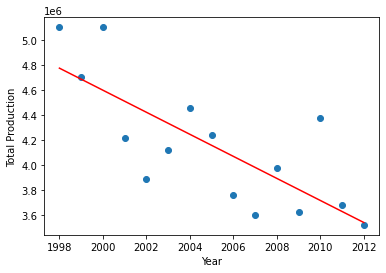

<Figure size 432x288 with 0 Axes>

In [7]:
# y_prediction
y_predict = regr.predict(X)

plt.scatter(X, y)
plt.plot(X,y_predict, color = 'red')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.show()
plt.clf()

### Predict the Honey Decline

In [8]:
# Create a numpy array called X-future that is the range from 2013 to 2050

X_future = np.array(range(2013,2051))
X_future = X_future.reshape(-1,1)
X_future

array([[2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021],
       [2022],
       [2023],
       [2024],
       [2025],
       [2026],
       [2027],
       [2028],
       [2029],
       [2030],
       [2031],
       [2032],
       [2033],
       [2034],
       [2035],
       [2036],
       [2037],
       [2038],
       [2039],
       [2040],
       [2041],
       [2042],
       [2043],
       [2044],
       [2045],
       [2046],
       [2047],
       [2048],
       [2049],
       [2050]])

In [9]:
future_predict = regr.predict(X_future)

### Plot future honey prediction

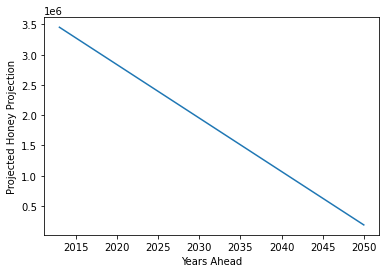

In [10]:
plt.plot(X_future,future_predict)
plt.xlabel('Years Ahead')
plt.ylabel('Projected Honey Projection')
plt.show()

### Production will keep declining